In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [4]:
data = pd.read_csv('Titanic/train.csv')
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
'''Changing Sex to Integers for Data Analysis (0 for male, 1 for female)'''
[b for b in data['Sex'] if (b != 'male' and b != 'female')] #test came up empty so that implies every member is either male or female
def change_sex_to_number(gender):
    if gender == 'male':
        return 0
    else:
        return 1
data['Sex_Number'] = [change_sex_to_number(sex) for sex in data['Sex']]
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
'''Changing Embarked Location to Numbers (0 for unknown, 1 for S, 2 for C, 3 for Q)'''
[test for test in data['Embarked'] if (test != 'S' and test != 'C' and test != 'Q')]


[nan, nan]

In [20]:
#Above indicates there are two unknown values. For our sakes, we will set it to 0
def change_embarked_to_number(embarked):
    if embarked == 'S':
        return 1
    elif embarked == 'C':
        return 2
    elif embarked == 'Q':
        return 3
    else:
        return 1
data['Embarked_number'] = [change_embarked_to_number(embarked) for embarked in data['Embarked']]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number,Embarked_number,Name_Plain,Title,Title_Numeric,Very_Young
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Braund Mr Owen Harris,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Cumings Mrs John Bradley Florence Briggs Thayer,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Heikkinen Miss Laina,Miss,5,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Futrelle Mrs Jacques Heath Lily May Peel,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Allen Mr William Henry,Mr,0,0


In [8]:
#Right now the relevant data we have is the pclass - indicators of social status, sex, age, siblings/spouses, children/parents, and embarked
#My guess is that it won't really matter for embarked, so let us test that. 
def get_totals_and_survived(data, string):
    max_string = max(data[string])
    totals = [0 for _ in range(max_string + 1)]
    survived = totals[:]
    for per in range(len(data)):
        totals[data[string][per]] += 1
        survive = data['Survived'][per]
        if survive == 1:
            survived[data[string][per]] += 1
    return totals, survived
totals, survived = get_totals_and_survived(data, 'Embarked_number')
print(totals)
print(survived)
totals = totals[1:] #gets rid of unknowns since there are only two
survived = survived[1:]

[2, 644, 168, 77]
[2, 217, 93, 30]


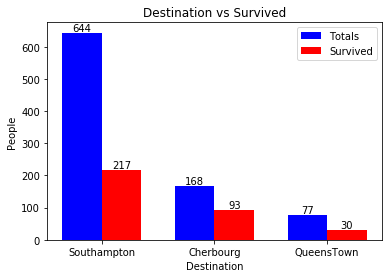

[0.33695652173913043, 0.5535714285714286, 0.38961038961038963]

In [9]:

#Most of this code is copied from https://matplotlib.org/examples/api/barchart_demo.html
N = 3
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
col1 = ax.bar(ind, totals, width, color = 'b')
col2 = ax.bar(ind + width, survived, width, color = 'r')

ax.set_ylabel('People')
ax.set_xlabel('Destination')
ax.set_title('Destination vs Survived')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Southampton', 'Cherbourg', 'QueensTown'))

ax.legend((col1[0], col2[0]), ('Totals', 'Survived'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(col1)
autolabel(col2)
plt.show()
percentage = [survived[i]/totals[i] for i in range(N)]
percentage

It doesn't look like there is much of a relationship between the destination and the number surivived. Cherbourg did have a little bit of luck? But right now, I am not very convinced. I will keep the data, but let us analyze social class versus survived next.


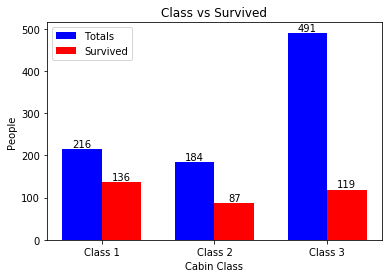

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

In [10]:
totals, survived = get_totals_and_survived(data, 'Pclass')

totals, survived = totals[1:], survived[1:]

N = 3
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
col1 = ax.bar(ind, totals, width, color = 'b')
col2 = ax.bar(ind + width, survived, width, color = 'r')

ax.set_ylabel('People')
ax.set_xlabel('Cabin Class')
ax.set_title('Class vs Survived')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3'))

ax.legend((col1[0], col2[0]), ('Totals', 'Survived'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(col1)
autolabel(col2)
plt.show()
percentage = [survived[i]/totals[i] for i in range(N)]
percentage


This looks more promising as an attribute, but not much more than the destination, therefore I believe that we should keep these features. Let us check out male vs female now

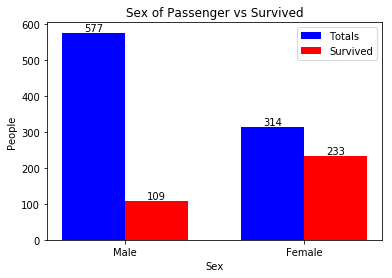

[0.18890814558058924, 0.7420382165605095]

In [124]:
totals, survived = get_totals_and_survived(data, 'Sex_Number')



N = 2
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
col1 = ax.bar(ind, totals, width, color = 'b')
col2 = ax.bar(ind + width, survived, width, color = 'r')

ax.set_ylabel('People')
ax.set_xlabel('Sex')
ax.set_title('Sex of Passenger vs Survived')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Male', 'Female'))

ax.legend((col1[0], col2[0]), ('Totals', 'Survived'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(col1)
autolabel(col2)
plt.show()
percentage = [survived[i]/totals[i] for i in range(N)]
percentage


Yeah there is clearly something off here, this will be important in training for the decision trees later. Let us look more closely at the titles. From initial analysis of the names, each name seems to have a title which indicates their probabalistic role on the titanic. 

In [125]:
data['Name_Plain'] = ["".join(l for l in b if l not in string.punctuation) for b in data['Name']]
print(data['Name_Plain'])

0                                  Braund Mr Owen Harris
1        Cumings Mrs John Bradley Florence Briggs Thayer
2                                   Heikkinen Miss Laina
3               Futrelle Mrs Jacques Heath Lily May Peel
4                                 Allen Mr William Henry
5                                         Moran Mr James
6                                  McCarthy Mr Timothy J
7                           Palsson Master Gosta Leonard
8          Johnson Mrs Oscar W Elisabeth Vilhelmina Berg
9                        Nasser Mrs Nicholas Adele Achem
10                         Sandstrom Miss Marguerite Rut
11                                Bonnell Miss Elizabeth
12                          Saundercock Mr William Henry
13                             Andersson Mr Anders Johan
14                    Vestrom Miss Hulda Amanda Adolfina
15                          Hewlett Mrs Mary D Kingcome 
16                                    Rice Master Eugene
17                            W

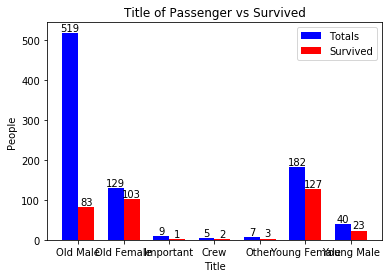

[0.1599229287090559,
 0.7984496124031008,
 0.1111111111111111,
 0.4,
 0.42857142857142855,
 0.6978021978021978,
 0.575]

In [19]:
titles = {'Mrs', 'Mr', 'Miss', 'Master', 'Dona', 'Captain', 'Rev', 'Don', 'Dr', 'Ms', 'Major', 'Mlle','Col', 'Jonkheer', 'Mme', 'Capt', 'Countess'}
data['Title'] = [[word for word in sting.split() if word in titles][0] for sting in data['Name_Plain']]
data['Title']

#Now we will introduce terminology for simplified titles - rare (Major, Captain, Col), important (Don, Dona, Jonkheer, Rev, Countess),  old_male (Mr), young_male (Master), old_female (Mrs), young_female (Miss, Ms, Mlle)

simp_title = {'Mrs': 1, 'Mr': 0, 'Miss': 5, 'Ms': 1, 'Master': 6, 'Dona': 2, 'Captain': 3, 'Rev': 2, 'Don': 2, 'Dr': 4, 'Major': 3, 'Mlle': 1, 'Col': 3, 'Jonkheer': 2, 'Mme': 0, 'Capt': 3, 'Countess': 2}

data['Title_Numeric'] = [simp_title[sting] for sting in data['Title']]
data['Title_Numeric']

totals, survived = get_totals_and_survived(data, 'Title_Numeric')

N = 7
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
col1 = ax.bar(ind, totals, width, color = 'b')
col2 = ax.bar(ind + width, survived, width, color = 'r')

ax.set_ylabel('People')
ax.set_xlabel('Title')
ax.set_title('Title of Passenger vs Survived')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Old Male', 'Old Female', 'Important', 'Crew', 'Other', 'Young Female', 'Young Male'))

ax.legend((col1[0], col2[0]), ('Totals', 'Survived'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(col1)
autolabel(col2)
plt.show()
percentage = [survived[i]/totals[i] for i in range(N)]
percentage

It is hard to say what exactly this means..but the title does not seem too signficant. If anything, an important title means a lower chance of survival. Let's just look at age distributions next. 

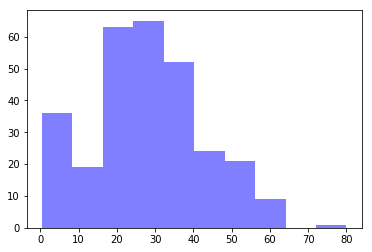

In [11]:
survived_age = [data['Age'][index] for index in range(len(data['Age'])) if data['Survived'][index] == 1 and data['Age'][index] >= 0]
num_bins = 10
n, bins, patches = plt.hist(survived_age, num_bins, facecolor='blue', alpha=0.5)
plt.show()


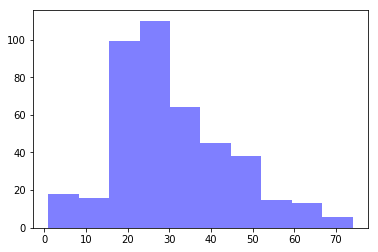

In [12]:

died_age = [data['Age'][index] for index in range(len(data['Age'])) if data['Survived'][index] == 0 and data['Age'][index] >= 0]
num_bins = 10
n, bins, patches = plt.hist(died_age, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [129]:
#The only indicator I see is that old people died, and very very young children survived. So I will create a feature called, very very young

data['Very_Young'] = [int(b <= 5) for b in data['Age']]
data['Very_Young']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    1
870    0
871    0
872    0
873    0
874    0
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    0
889    0
890    0
Name: Very_Young, Length: 891, dtype: int64

In [26]:
#Alright Now that I have done this, I will just define a function that will manipulate a data-set in a necessary way to get to how our data is now

def add_feat(data):
    
    titles = ['Mrs','Mr', 'Miss', 'Ms', 'Master', 'Dona', 'Captain', 'Rev', 'Don', 'Dr', 'Major', 'Mlle', 'Col', 'Jonkheer', 'Mme', 'Capt', 'Countess' , 'Sir', 'Mme'] 

    simp_title = {'Mr': 1, 'Mrs': 2, 'Master': 3, 'Miss': 4, 'Army': 5, 'Academic': 6, 'Royal': 7}
            
    data['Sex_Number'] = [change_sex_to_number(sex) for sex in data['Sex']]
    data['Embarked_number'] = [change_embarked_to_number(embarked) for embarked in data['Embarked']]
    data['Name_Plain'] = ["".join(l for l in b if l not in string.punctuation) for b in data['Name']]
    data['Very_Young'] = [int(b <= 5) for b in data['Age']]
    data['Title'] = [[word for word in sting.split() if word in titles][0] for sting in data['Name_Plain']]
    data['Title'] = data['Title'].replace(['Capt', 'Col', 'Major'], 'Army')
    data['Title'] = data['Title'].replace(['Dr', 'Rev'], 'Academic')
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Dona'], 'Royal')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title_Numeric'] = [simp_title[sting] for sting in data['Title']]
    
add_feat(data)

In [27]:
print(pd.isnull(data).sum())
#Finally, I want to correct for any null values in the table. I will not be using the Cabin Feature since it is pretty useless

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Sex_Number           0
Embarked_number      0
Name_Plain           0
Title                0
Title_Numeric        0
Very_Young           0
dtype: int64


In [48]:
def avg(lst):
    return sum(lst) / len(lst)

In [57]:
 def change_age(data):
    nul = data['Age'].isnull()
    old_male_avg = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 1])
    
    old_female_avg = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 2])
    
    young_female_avg = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 4])
    young_male_avg = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 3])
    army_average = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 5])
    royal_average =avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 7])
    academic_average = avg([data['Age'][index] for index in range(len(data['Age'])) if not nul[index] and data['Title_Numeric'][index] == 6])
    age_avg = { 1: old_male_avg, 2: old_female_avg, 4: young_female_avg, 3: young_male_avg, 5: army_average, 6: academic_average, 7: royal_average}
    
    print(age_avg)
    
    
    for index in range(len(nul)):
        if nul[index]:
            if data['Title_Numeric'][index] in age_avg:
                data['Age'][index] = age_avg[data['Title_Numeric'][index]]
      
                
change_age(data)
                

{1: 32.368090452261256, 2: 35.900000000000006, 4: 21.845637583892625, 3: 4.5741666666666667, 5: 56.600000000000001, 6: 42.583333333333329, 7: 40.0}


In [59]:
data.isnull().sum()


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Sex_Number           0
Embarked_number      0
Name_Plain           0
Title                0
Title_Numeric        0
Very_Young           0
dtype: int64